<div align="center">
    <h1>Page View Time Series Visualizer</h1>
    <img src="page-view.png" width="300" alt="Page View Picture">
</div>

In [43]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [47]:
# Import the data
views_df = pd.read_csv("fcc-forum-pageviews.csv")

# Set data column to Pandas DateTime Data Type
views_df["date"] = pd.to_datetime(views_df["date"])

# Set the index to the data column
views_df.set_index("date", inplace = True)

In [48]:
# Clean the data by removing top 2.5% and bottom 2.5%

# Find top 2.5%
top_per = views_df["value"].quantile(1 - 0.025)
bottom_per = views_df["value"].quantile(0.025)

views_df = views_df[(views_df["value"] <= top_per) & (views_df["value"] >= bottom_per)]

<Axes: title={'center': 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'}, xlabel='Date', ylabel='Page Views'>

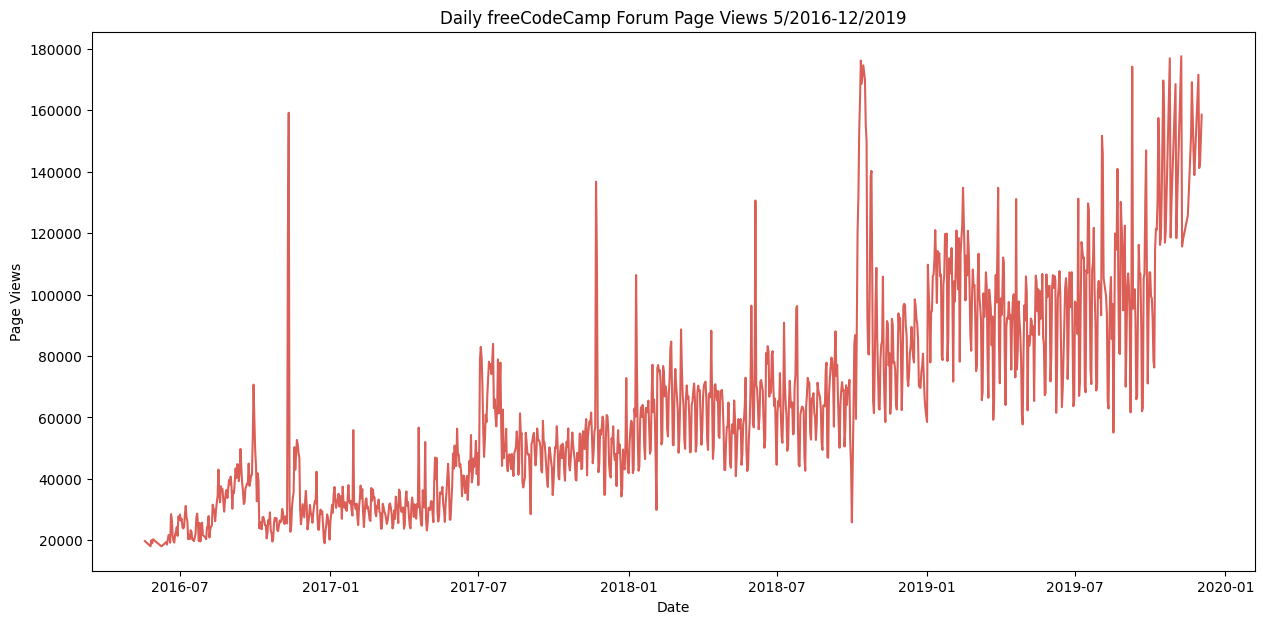

In [77]:
# Draw line plot
fig, ax = plt.subplots(figsize=(15, 7),dpi=100)
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")
sns.lineplot(data=views_df, legend=False, palette = "hls")

/tmp/ipykernel_15210/839120662.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='center')


[Text(0, 0, '2016'),
 Text(1, 0, '2017'),
 Text(2, 0, '2018'),
 Text(3, 0, '2019')]

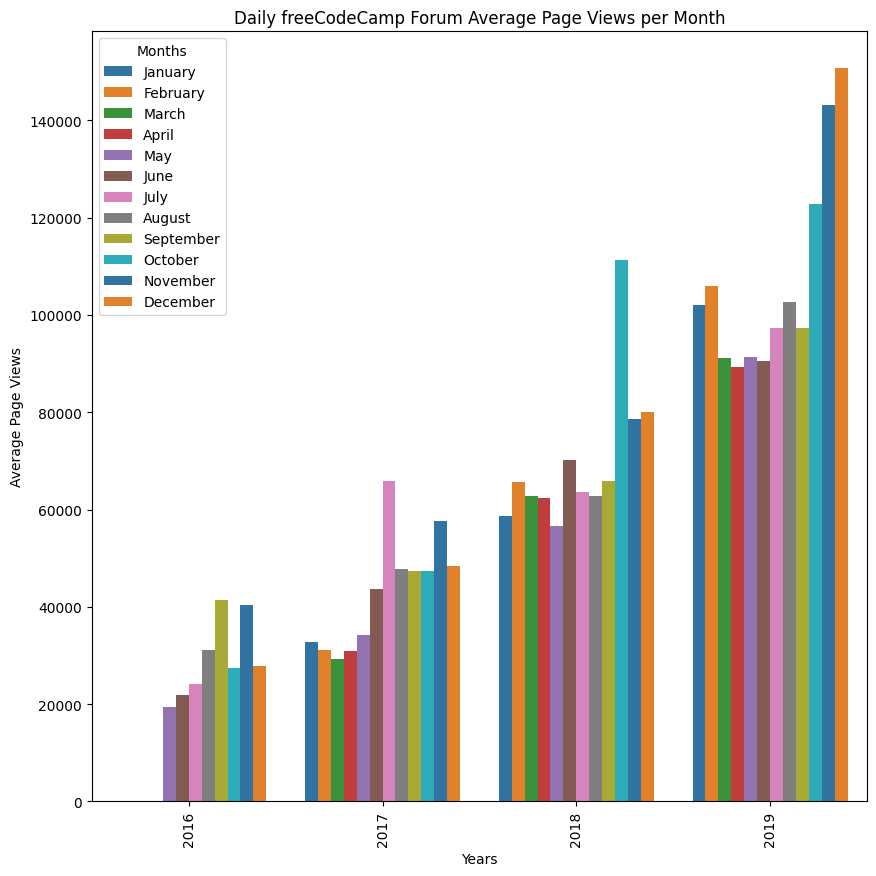

In [66]:
# Make bar chart
views_df_bar = views_df.copy()
views_df_bar["Years"] = views_df_bar.index.year
views_df_bar["Months"] = views_df_bar.index.month_name()
views_df_bar = pd.DataFrame(views_df_bar.groupby(["Years", "Months"], sort=False)["value"].mean().round().astype(int))
views_df_bar = views_df_bar.rename(columns={"value": "Average Page Views"})
views_df_bar = views_df_bar.reset_index()

lost_data = {
    "Years": [2016, 2016, 2016, 2016],
    "Months": ['January', 'February', 'March', 'April'],
    "Average Page Views": [0, 0, 0, 0]
}

views_df_bar = pd.concat([pd.DataFrame(lost_data), views_df_bar])

# Draw bar plot
fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
ax.set_title("Daily freeCodeCamp Forum Average Page Views per Month")

chart = sns.barplot(data=views_df_bar, x="Years", y="Average Page Views", hue="Months", palette="tab10")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='center')

/tmp/ipykernel_15210/2737586137.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=views_df_box, x="year", y="value", ax=axes[0], palette = "hls")
/tmp/ipykernel_15210/2737586137.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=views_df_box, x="month", y="value", order=month_order, ax=axes[1], palette = "Paired")


Text(0, 0.5, 'Page Views')

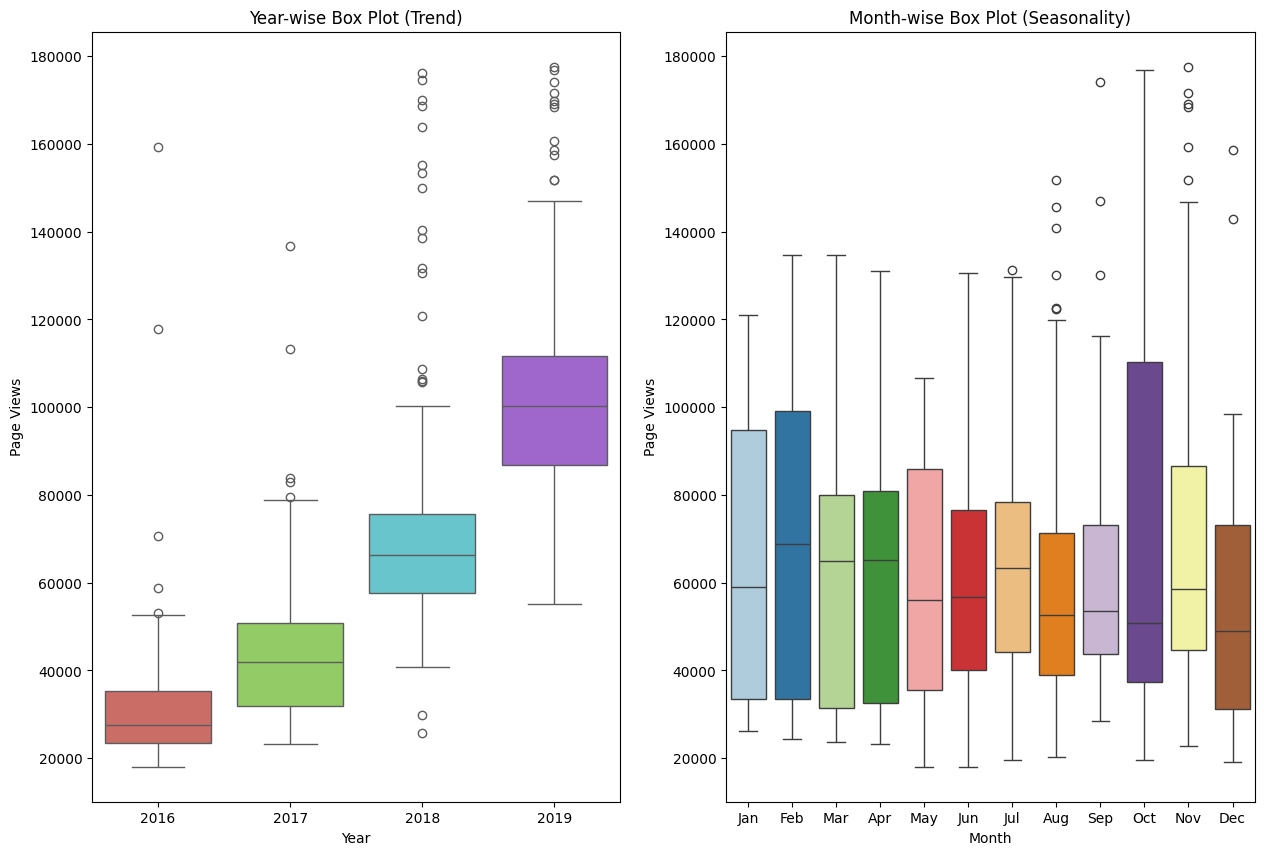

In [75]:
# Create box plot
views_df_box = views_df.copy()
views_df_box.reset_index(inplace=True)
views_df_box['year'] = [d.year for d in views_df_box.date]
views_df_box['month'] = [d.strftime('%b') for d in views_df_box.date]

# Draw box plots (using Seaborn)
fig, axes = plt.subplots(1, 2, figsize=(15, 10), dpi=100)

# Yearly boxplot
sns.boxplot(data=views_df_box, x="year", y="value", ax=axes[0], palette = "hls")
axes[0].set_title("Year-wise Box Plot (Trend)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page Views")

# Monthly boxplot
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sns.boxplot(data=views_df_box, x="month", y="value", order=month_order, ax=axes[1], palette = "Paired")
axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Page Views")
